In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_parquet('../csv_export/RFM.parquet')

In [3]:
categorical_cols = [
    'FAVOURITE_STORE',
    'FAVOURITE_STORE_TYPE',
    'FAVOURITE_PAYMENT_METHOD',
    'FAVORITE_CATEGORY',
    'FAVORITE_SUB_CATEGORY',
    'FAVORITE_WEEKDAY'
]

numerical_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col != 'CUSTOMER_ID' and col != 'FAVORITE_HOUR'  
]

categorical_cols.append('FAVORITE_HOUR')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,223393.0,417.331877,352.667029,0.00000,81.00000,334.000000,766.000000,1252.000000
Frequency,223393.0,5.687792,15.313319,1.00000,1.00000,2.000000,4.000000,878.000000
Monetary,223393.0,419.500775,1441.095256,0.00000,49.80000,100.800000,284.500000,119211.070100
Total_Units,223393.0,12.029450,33.330711,1.00000,2.00000,4.000000,9.000000,2138.000000
Total_Organic_Discount,223393.0,52.032165,213.602594,0.00000,0.00000,8.010000,32.800000,17711.220000
Total_Extra_Discount,223393.0,46.423160,149.846415,0.00000,0.00000,14.500000,40.200000,10982.184700
Total_Discounts,223393.0,98.455324,290.280077,0.00000,18.11000,35.520000,77.310000,23589.990000
AVG_ORGANIC_DISCOUNT_PER_ORDER,223393.0,6.968707,9.750065,0.00000,0.00000,4.200000,11.110000,1623.600000
USED_ORGANIC_DISCOUNT_RATIO,223393.0,0.527071,0.468247,0.00000,0.00000,0.666667,1.000000,1.000000
AVG_EXTRA_DISCOUNT_PER_ORDER,223393.0,13.688880,16.879577,0.00000,0.00000,6.200000,27.900000,657.840000


In [20]:
x_df = pd.read_csv('../csv_export/X_df.csv')

In [25]:
x_df.columns.to_list()

['Recency',
 'Frequency',
 'Monetary',
 'Total_Units',
 'Total_Organic_Discount',
 'Total_Extra_Discount',
 'Total_Discounts',
 'AVG_ORGANIC_DISCOUNT_PER_ORDER',
 'USED_ORGANIC_DISCOUNT_RATIO',
 'AVG_EXTRA_DISCOUNT_PER_ORDER',
 'USED_EXTRA_DISCOUNT_RATIO',
 'AVG_TOTAL_DISCOUNT_PER_ORDER',
 'USED_TOTAL_DISCOUNT_RATIO',
 'AVG_UNIT_QUANTITY_PER_ORDER',
 'IS_BULK_BUYER',
 'BUNDLE_PURCHASE_RATIO',
 'CATEGORY_DIVERSITY',
 'SUB_CATEGORY_DIVERSITY',
 'AVG_DELIVERY_TIME',
 'SLA_VIOLATION_RATE',
 'AVG_APPROVAL_TIME',
 'AVG_TOTAL_DISTANCE',
 'FAVOURITE_STORE_Accra',
 'FAVOURITE_STORE_Addis Ababa',
 'FAVOURITE_STORE_Andorra la Vella',
 'FAVOURITE_STORE_Apia',
 'FAVOURITE_STORE_Asmara',
 'FAVOURITE_STORE_Asuncion',
 'FAVOURITE_STORE_Athens',
 'FAVOURITE_STORE_Bamako',
 'FAVOURITE_STORE_Bangkok',
 'FAVOURITE_STORE_Bangui',
 'FAVOURITE_STORE_Banjul',
 'FAVOURITE_STORE_Beijing',
 'FAVOURITE_STORE_Belgrade',
 'FAVOURITE_STORE_Belmopan',
 'FAVOURITE_STORE_Berlin',
 'FAVOURITE_STORE_Bogota',
 'FAVOURITE_

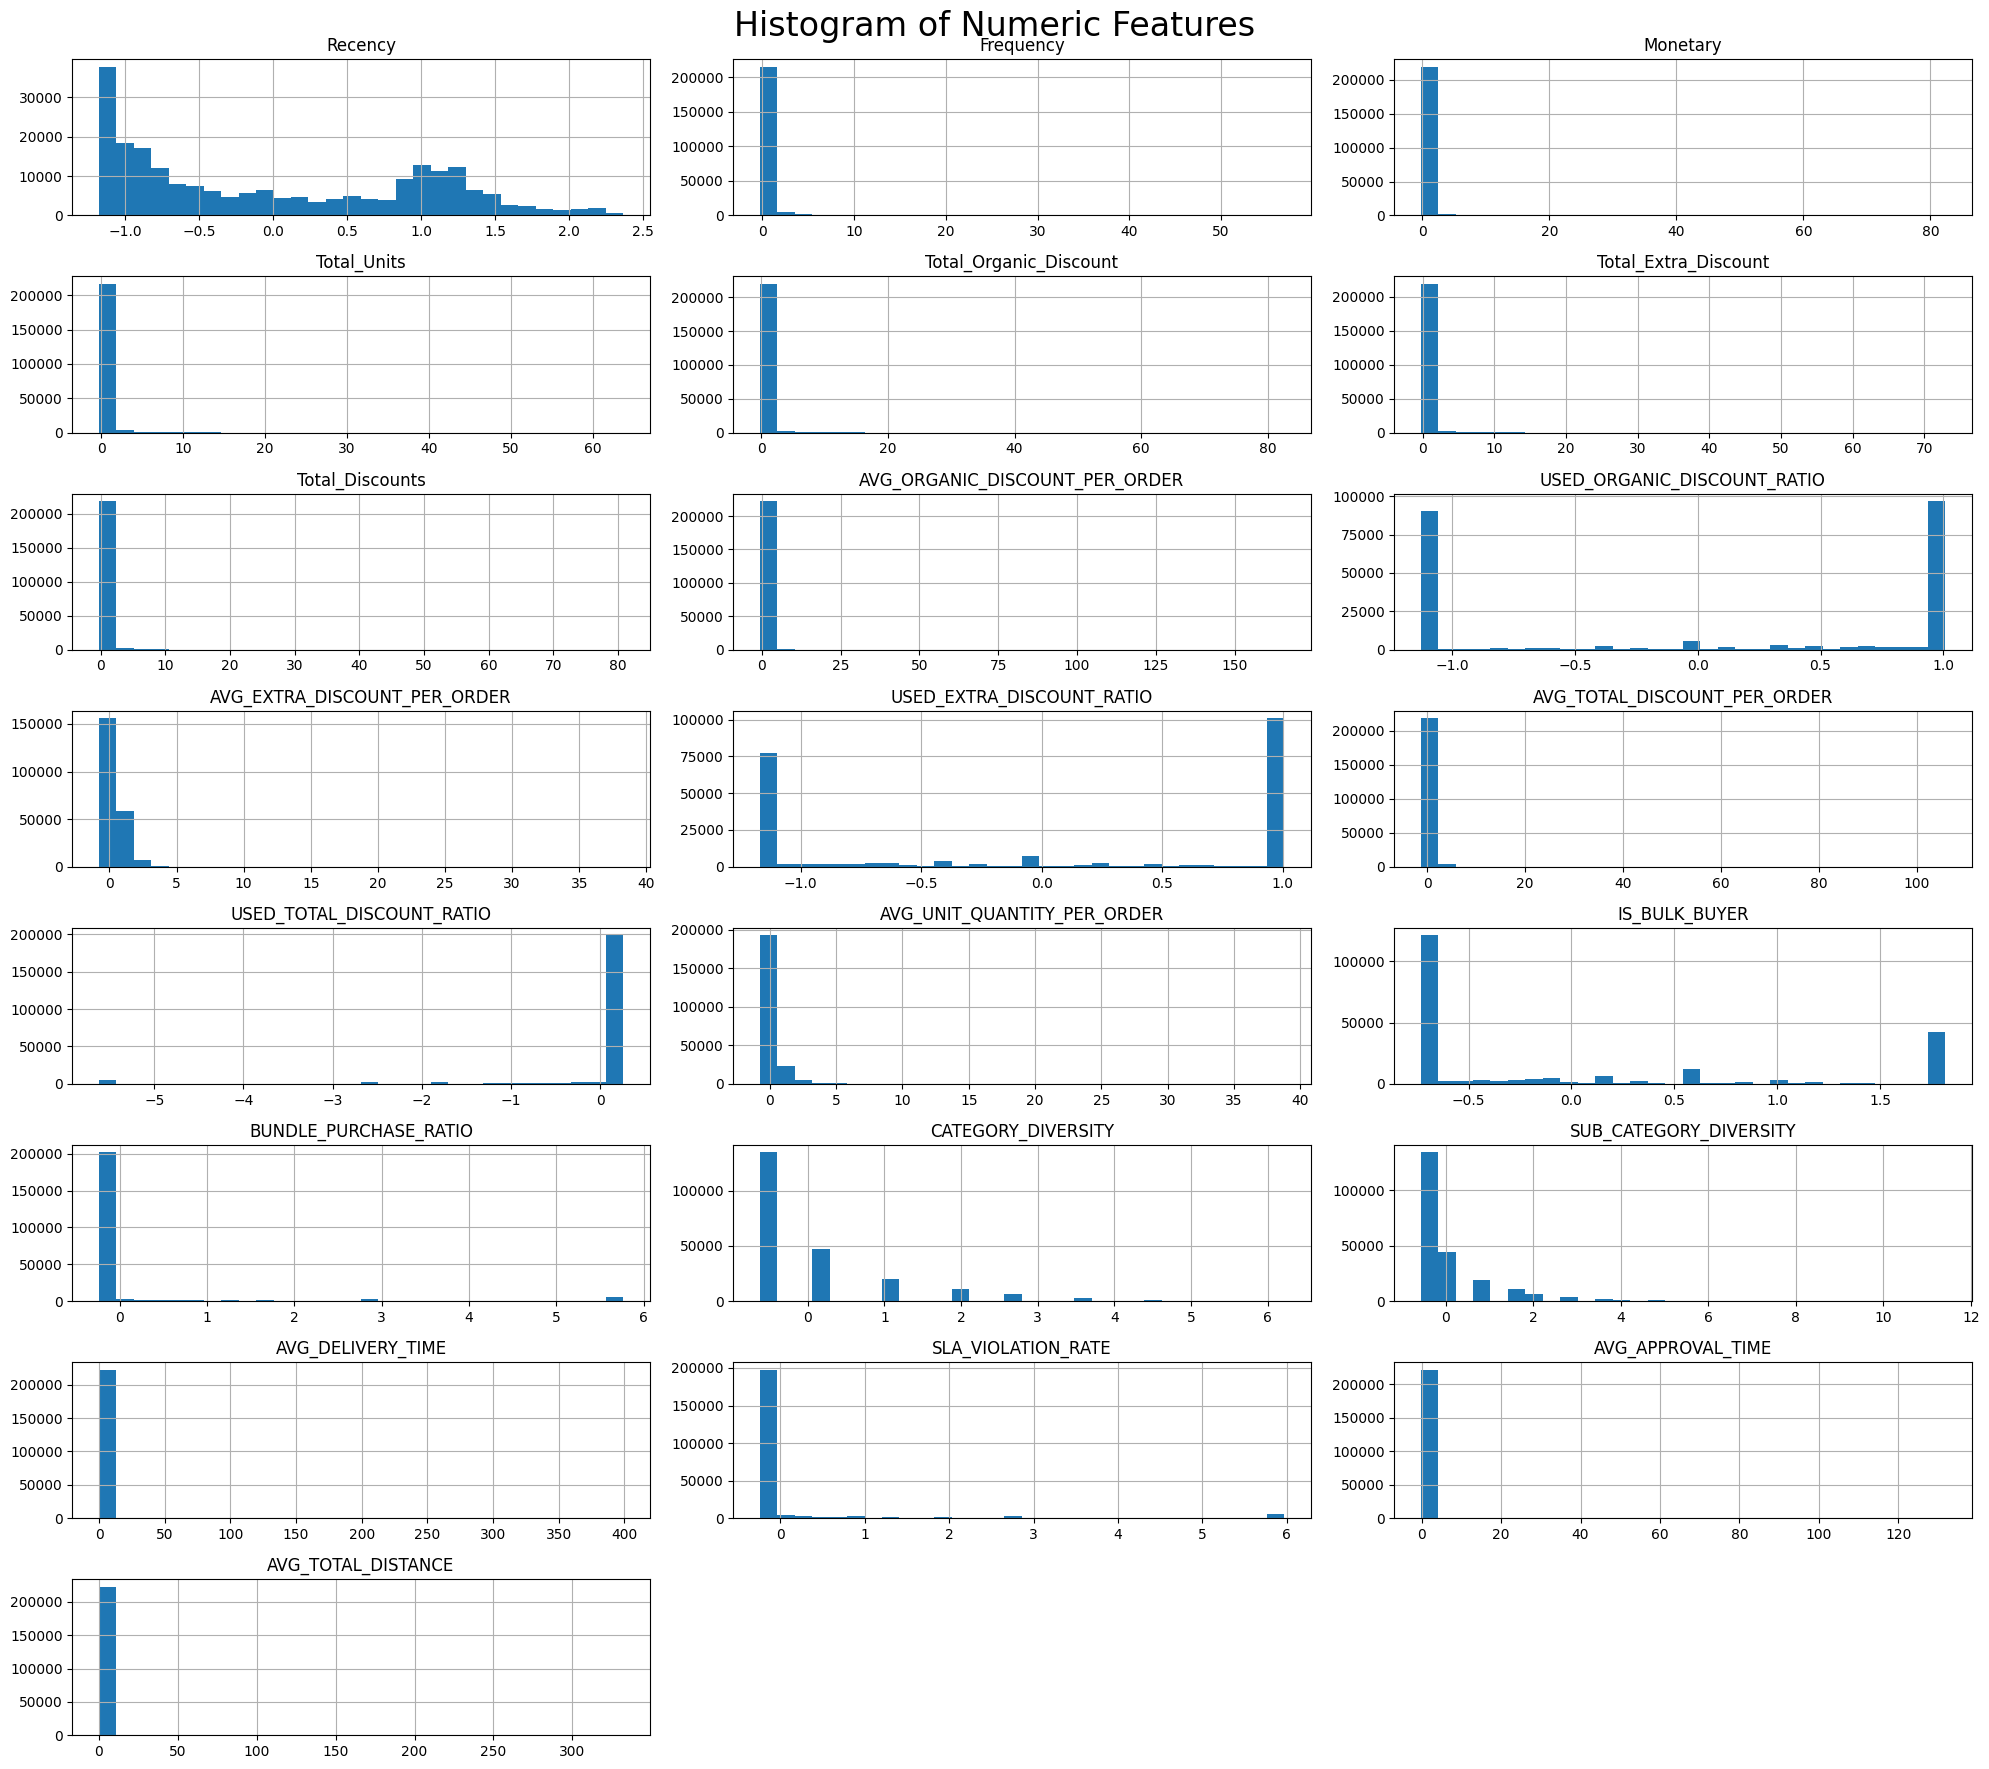

In [26]:
# Histograma Grid
x_df[numerical_cols].hist(figsize=(20, 18), bins=30, layout=(8, 3))
plt.suptitle("Histogram of Numeric Features", fontsize=24)
plt.tight_layout()
plt.show()


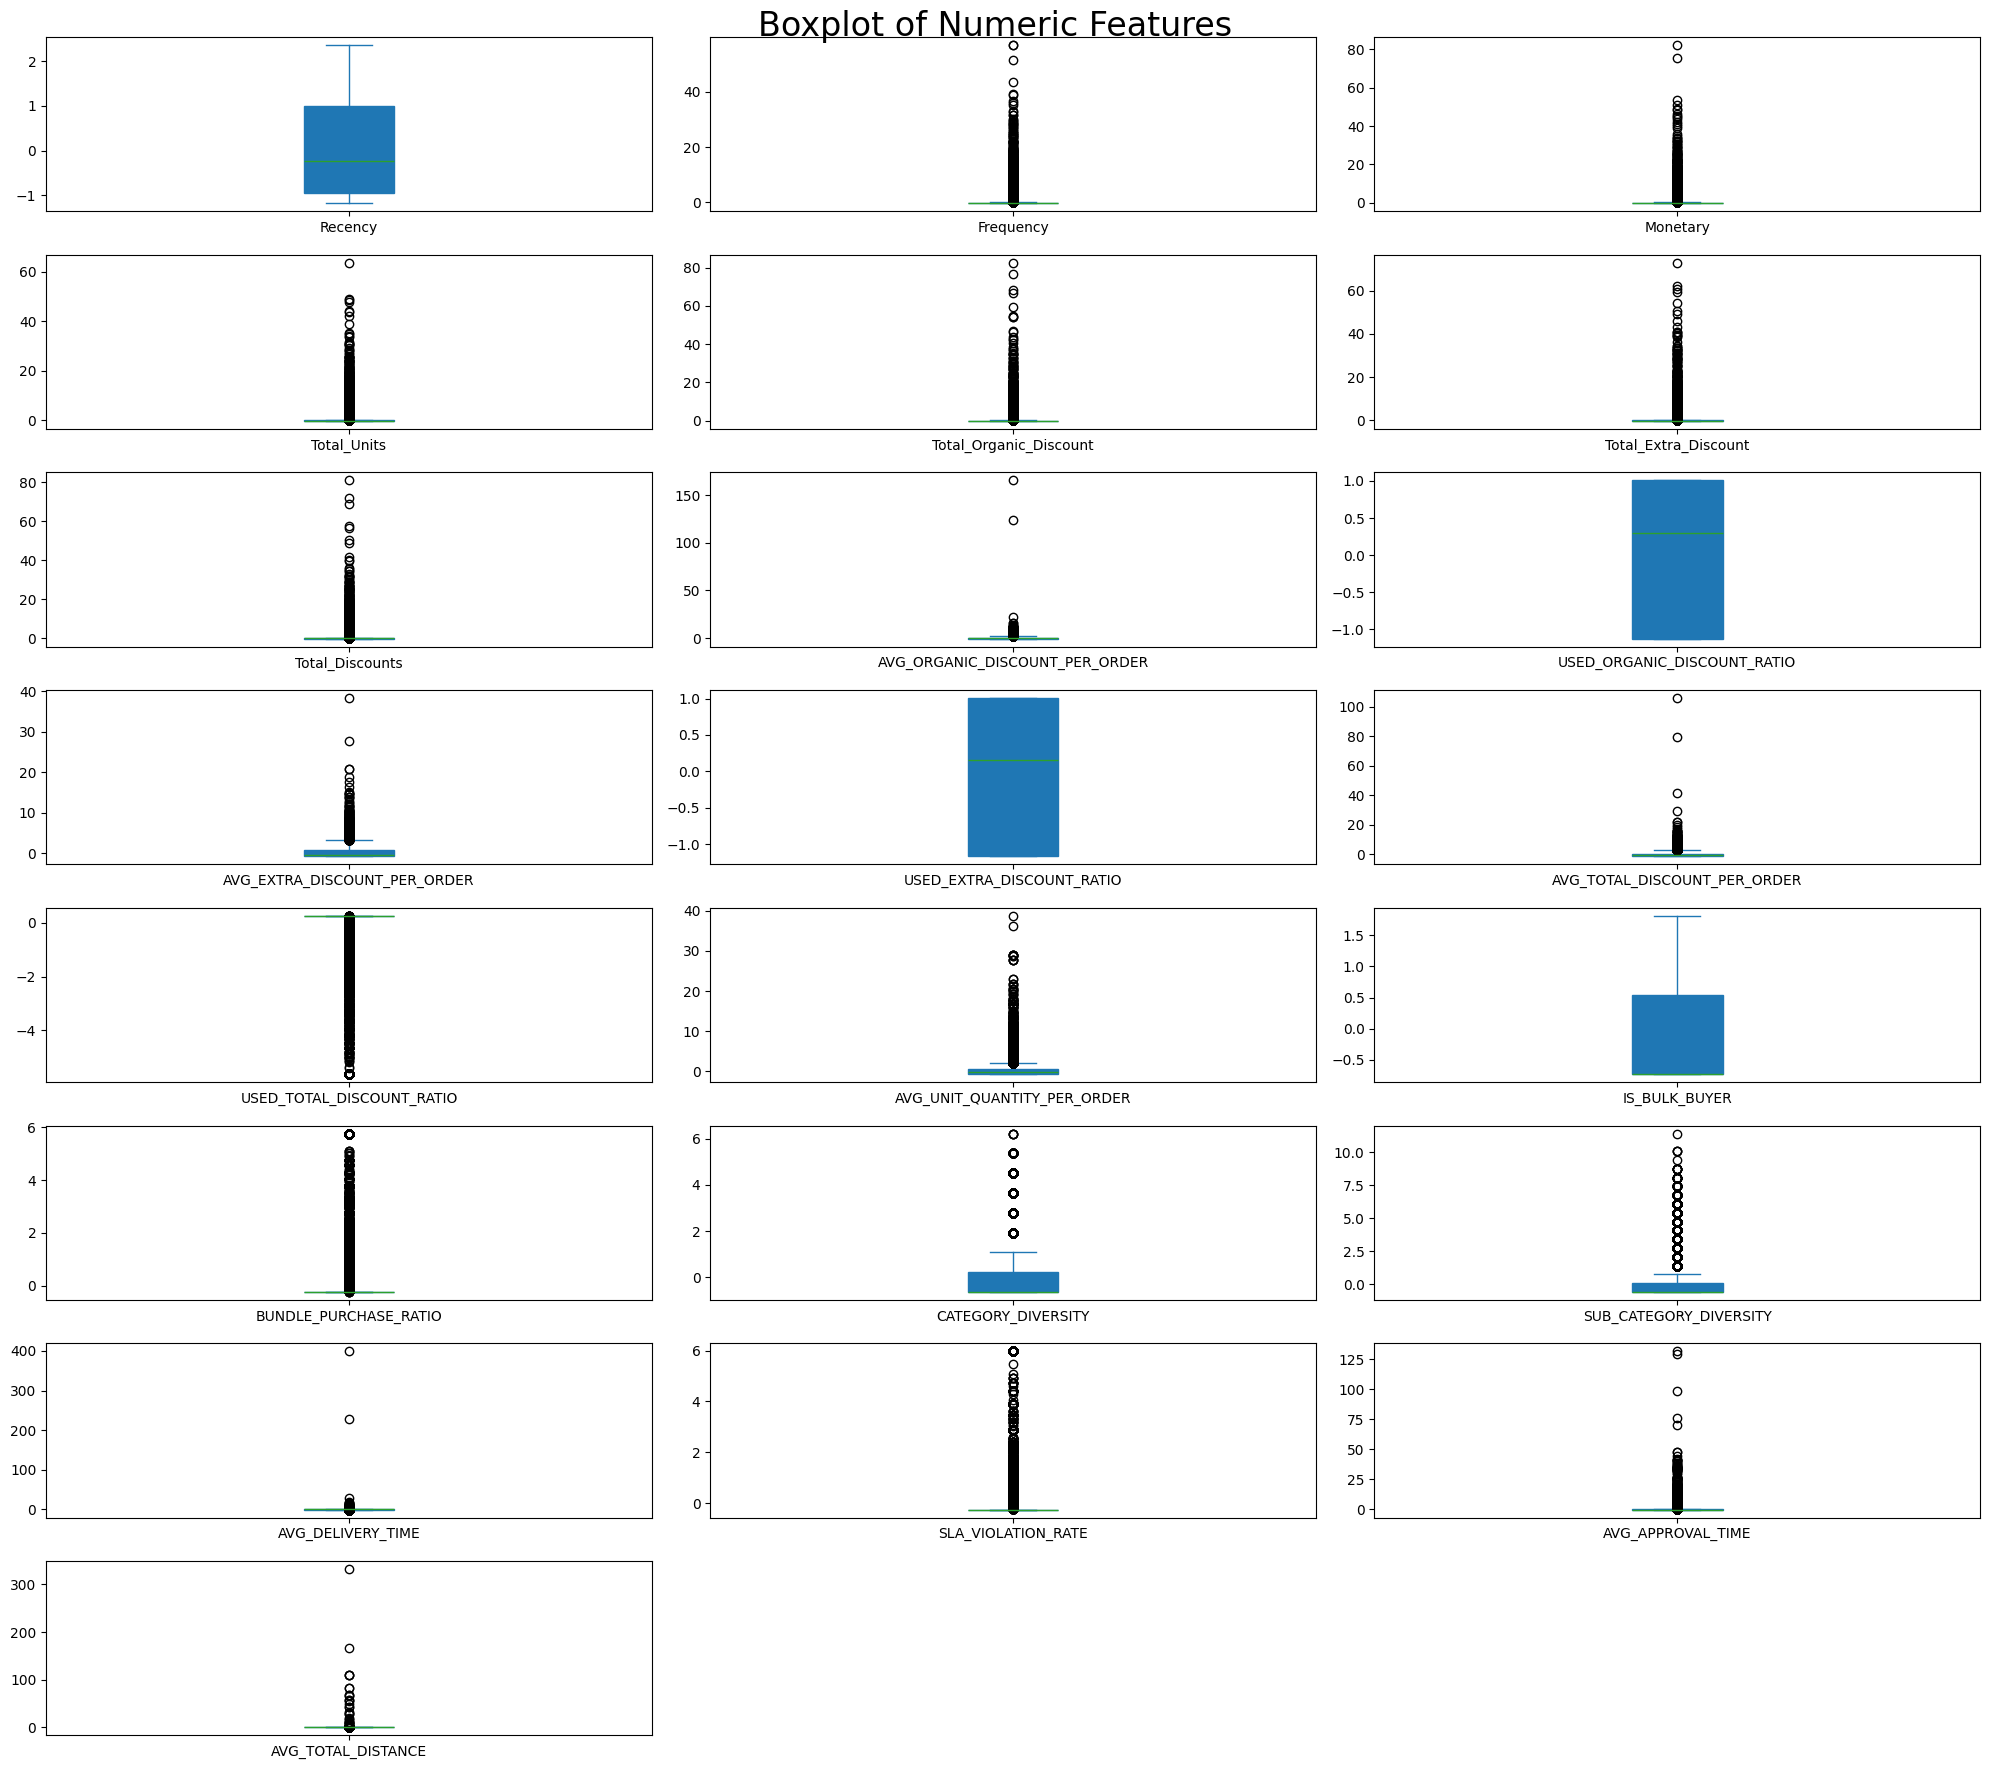

In [27]:
# Boxplot Grid
x_df[numerical_cols].plot(kind='box', subplots=True, layout=(8, 3), figsize=(20, 18), patch_artist=True)
plt.suptitle("Boxplot of Numeric Features", fontsize=24)
plt.tight_layout()
plt.show()